In [1]:
import nltk
import re
from nltk.tokenize import sent_tokenize

In [2]:
text = """
Picture used for illustrative purposes.
China’s yuan ended at a fresh 26-month low on Monday and traded below the psychologically critical 7-per-dollar level, pressured by bets for another big rate hike from the US Federal Reserve later this week.The onshore yuan finished the domestic trading session at 7.0179 per dollar, its weakest close since July 14, 2020, and 474 pips or 0.68 per cent weaker than the previous late-night close of 6.9705.Its offshore counterpart traded at 7.0220 around 0830 GMT.Before the market opened, the People’s Bank of China (PBOC) set the midpoint rate at 6.9396 per dollar, 91 pips or 0.13% weaker than the previous fix of 6.9305 on Friday.However, the official guidance came in firmer than market projections, traders and analysts said, continuing a trend seen since late August that market participants interpret as a bid to slow the yuan’s slide.“The strong fixing bias could also be an attempt to offset the pressure from the net open market operation (OMO) injection on the yuan,” analysts at Maybank said in a note.The PBOC injected a net 12 billion yuan ($1.71 billion) through short-term liquidity tools on Monday to counteract quarter-end higher cash demand, while also lowering the borrowing cost of 14-day reverse repos.Higher cash injections and lower interest rates should naturally pressure the currency, analysts said.Currency traders said the yuan remained under pressure ahead of a slew of global central bank meetings this week, where the Fed and the Bank of England are expected to further hike rates.China, along with Japan, has been a major outlier in a global run of interest rate hikes to tame inflation, with Beijing focused on reviving an economy hurt by COVID-19 shocks.But such widening policy divergence weighed on the yuan and limited room for Beijing to further manoieuvre monetary easing.
A Reuters poll showed that China is expected to keep lending benchmarks unchanged on Tuesday, with authorities seen holding off monetary easing in the short-term to avoid more depreciation pressure.“Different from the past few rounds of RMB depreciation, the collapse of RMB forward points makes RMB short easy to hold due to positive carry,” analysts at OCBC Bank said in a note.“This will make China’s counter-cyclical measures less effective to stop RMB depreciation than what they did before.”One-year dollar/yuan swap points traded in the forward market hovered at a 12-year low of -1,445 points on Monday.Instead, state media have increasingly warned the market of strong one-way bets against the local currency, with traders and analysts viewing them as part of official attempts to rein in excess yuan weakness.Wang Chunying, spokesperson of the State Administration of Foreign Exchange (SAFE), was quoted by the state broadcaster CCTV on Friday urging companies not to speculate on the currency.The CCTV also quoted unnamed sources close to the central bank as saying that the yuan will remain basically stable.Boost consumption: China will speed up fund injections to expedite project construction and boost domestic consumption, China’s state planner said on Monday, even after the economy showed signs of renewed momentum last month.The world’s second-biggest economy slowed sharply in the second quarter, dragged down by a deepening property crisis, and slowing exports and imports.However, it showed surprising resilience in August, with faster-than-expected growth in factory output and retail sales, although the property crisis continues to hang over recovery prospects.“The economy is at a critical juncture in its recovery, as the foundation of the domestic economic recovery is still weak despite main economic indicators showing positive changes,” said spokeswoman Meng Wei at the National Development and Reform Commission (NDRC).Shanghai, which lifted a two-month Covid lockdown in June, said it would hand out “consumption vouchers” worth around 100 million yuan ($14.3 million) to residents starting Tuesday, for use in a major shopping district.The southern island province of Hainan on Monday also said it would issue vouchers, again totalling 100 million yuan, to make consumption the main driver of the recovery.China’s cabinet has rolled out a raft of measures since late May to bolster an economy ravaged by disruptions caused by government restrictions and lockdowns.“Stringent COVID restrictions amid the Omicron variant have led to frequent local lockdowns and weighed on China’s economic activity this year,” said Goldman Sachs in a research note.“We estimate the current level of restrictions is suppressing the level of GDP in China by 4-5 per cent.”
"""

'\n'.join(sent_tokenize(re.sub('\.(?!\s|\d|$)','. ', text)))

'\nPicture used for illustrative purposes.\nChina’s yuan ended at a fresh 26-month low on Monday and traded below the psychologically critical 7-per-dollar level, pressured by bets for another big rate hike from the US Federal Reserve later this week.\nThe onshore yuan finished the domestic trading session at 7.0179 per dollar, its weakest close since July 14, 2020, and 474 pips or 0.68 per cent weaker than the previous late-night close of 6.9705.\nIts offshore counterpart traded at 7.0220 around 0830 GMT.\nBefore the market opened, the People’s Bank of China (PBOC) set the midpoint rate at 6.9396 per dollar, 91 pips or 0.13% weaker than the previous fix of 6.9305 on Friday.\nHowever, the official guidance came in firmer than market projections, traders and analysts said, continuing a trend seen since late August that market participants interpret as a bid to slow the yuan’s slide.\n“The strong fixing bias could also be an attempt to offset the pressure from the net open market operati

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv(r"D:\66 CausalMap\Panasonic-IDS\data\MarketIntelligenceReport.csv")
data.columns

Index(['id', 'Search date', 'Geography', 'Title', 'Text', 'Publication date',
       'Original', 'Translated', 'Month', 'Year', 'Label'],
      dtype='object')

In [5]:
dedup = data.drop_duplicates(subset=['Translated'])
print(len(data), 'vs', len(dedup))

9126 vs 6384


In [6]:
dedup['Translated'] = dedup['Translated'].apply(lambda s: '\n'.join(sent_tokenize(re.sub('\.(?!\s|\d|$)','. ', s))))

<ipython-input-6-19ee40d7c77a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dedup['Translated'] = dedup['Translated'].apply(lambda s: '\n'.join(sent_tokenize(re.sub('\.(?!\s|\d|$)','. ', s))))


In [7]:
dedup.sort_values(by='Translated')

,id,Search date,Geography,Title,Text,Publication date,Original,Translated,Month,Year,Label
765,81,28/9/2022 16:12,global,Stellantis: Suppliers bear all the risk,"""A key defense that you have under the law is ...",4/2/2022,en,"""A key defense that you have under the law is ...",Feb,2022,4
2345,336,1/10/2022 12:45,japan,Nissan tells dealers to stop taking orders for...,"""Ariya has been successfully accepted around t...",27/5/2022,en,"""Ariya has been successfully accepted around t...",May,2022,2
7386,560,23/9/2022 14:15,europe,Chinese Tesla rival Xpeng Motors launches seda...,"""At this price range with the features we put ...",14/4/2021,en,"""At this price range with the features we put ...",Apr,2021,4
29,30,27/9/2022 15:23,global,Stellantis sees India as profitable market,"""Being profitable in India is possible if you ...",18/5/2022,en,"""Being profitable in India is possible if you ...",May,2022,4
1038,363,28/9/2022 17:11,europe,Stellantis sees India as profitable market ami...,"""Being profitable in India is possible if you ...",18/5/2022,en,"""Being profitable in India is possible if you ...",May,2022,4
...,...,...,...,...,...,...,...,...,...,...,...
4659,537,23/9/2022 8:58,japan,Best hybrid cars and PHEVs 2022,► UK’s best hybrid cars on sale in 2022► Our p...,24/8/2022,en,► UK’s best hybrid cars on sale in 2022► Our p...,Aug,2022,5
8091,292,22/9/2022 15:27,japan,Hyundai Motor turns on EV plant in Indonesia t...,영문뉴스Hyundai Motor turns on EV plant in Indones...,17/3/2022,en,영문뉴스Hyundai Motor turns on EV plant in Indones...,Mar,2022,1
7873,74,22/9/2022 14:43,global,Hyundai Motor turns on EV plant in Indonesia t...,영문뉴스Hyundai Motor turns on EV plant in Indones...,17/3/2022,en,영문뉴스Hyundai Motor turns on EV plant in Indones...,Mar,2022,1
3388,80,19/9/2022 16:54,global,Newly Developed “1-motor Hybrid Transmission” ..., Improvement of vehicle mountability through ...,22/7/2022,en, Improvement of vehicle mountability through ...,Jul,2022,5


<ipython-input-8-6f8d93aa3ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dedup['n_sents'] = dedup['Translated'].apply(lambda x: len(x.split('\n')))


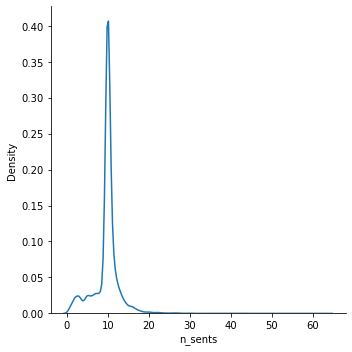

In [8]:
dedup['n_sents'] = dedup['Translated'].apply(lambda x: len(x.split('\n')))
# dedup['n_sents'].unique()
sns.displot(data=dedup, x="n_sents", kind="kde")

In [9]:
dedup['n_sents'].sum()

62151

In [10]:
dedup.to_csv(r"D:\66 CausalMap\Panasonic-IDS\data\MIR.csv", index=False, encoding='utf-8-sig')